In [1]:
import numpy as np
from typing import List
from matplotlib import pyplot as plt

from lib.Layers import Layer
from lib.Tensor import Tensor

In [2]:
class Dense(Layer):
    def __init__(self, input_dim: int, output_dim: int, lr: float = 0.01):
        self.weights = self.init_weights(input_dim, output_dim) # weights is a matrix of shape (input_dim, output_dim)
        self.bias = self.init_bias(output_dim) # bias is a matrix of shape (1, output_dim)
        self.lr = lr # learning rate
        self.input = None # save input for backward pass
    
    # initialize weights and bias
    def init_weights(self, input_dim: int, output_dim: int) -> 'Tensor':
        arr = np.random.randn(input_dim, output_dim) * 0.01 # initialize weights with small random numbers
        return Tensor(arr, requires_grad=True) # convert to Tensor
    
    def init_bias(self, output_dim: int) -> 'Tensor':
        arr = np.zeros((1, output_dim)) # initialize bias with zeros of shape (1, output_dim)
        return Tensor(arr, requires_grad=True) # convert to Tensor
    
    def parameters(self) -> List['Tensor']:
        return [self.weights, self.bias]
    
    # forward pass
    def forward(self, input_data: 'Tensor') -> 'Tensor':
        """
        Take an input tensor, multiply it with the weights and add the bias.
        
        X is a matrix of shape (batch_size, input_dim)
        W is a matrix of shape (input_dim, output_dim)
        b is a matrix of shape (1, output_dim)

        output = X @ W + b, matrix of shape (batch_size, output_dim)
        """
        input_features = input_data.shape[1] # input_dim
        if input_features != self.weights.shape[0]:
            raise RuntimeError(f"Input tensor with {input_features} features should match layer input dim {self.weights.shape[0]}")

        self.input = input_data # save input for backward pass
        #? not sure if i need to handle the case where batch_size = 1, and input_data is a vector
        self.output = input_data @ self.weights + self.bias # matrix multiplication
        return self.output
    
    # backward pass
    def backward(self) -> None:
        """
        Compute and store gradients for weights and biases based on the output_gradient
        coming from the next layer. Then, compute the gradient for the inputs to be
        sent to the previous layer.

        output_gradient is a tensor of shape (batch_size, output_dim)
        """

        if self.output.grad is None:
            raise RuntimeError("No gradient found. You might need to call backward on the loss Tensor first.")
        
        # compute gradient for weights

In [3]:
class Optimizer:
    """
    Base class for all optimizers.
    """
    def __init__(self):
        self.lr = None

    def step(self):
        raise NotImplementedError
    
    def zero_grad(self):
        raise NotImplementedError
    
class SGD(Optimizer):
    """
    Stochastic gradient descent optimizer.
    """
    def __init__(self, params: List['Tensor'], lr):
        self.lr = lr
        self.params = params
    
    def step(self):
        for param in self.params:
            if param.requires_grad:
                param.data = param.data - self.lr * param.grad
                # param.data -= self.lr * param.grad
                param.zero_grad()

    def zero_grad(self):
        for param in self.params:
            if param.requires_grad:
                param.zero_grad()

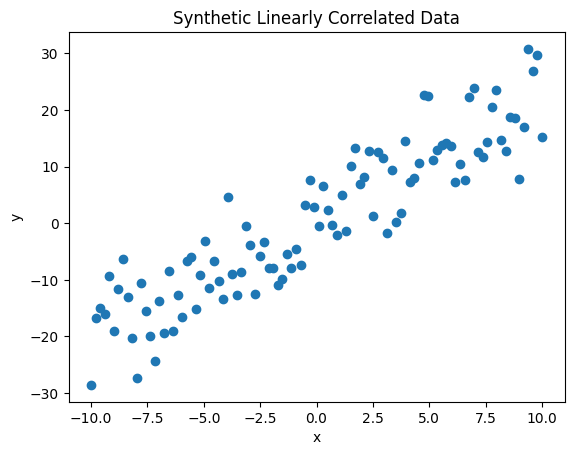

In [4]:
n_samples = 100

x = np.linspace(-10, 10, n_samples) # 100 samples between -10 and 10

# generate y = 2x + 1
y = 2 * x + 1
# add noise
y += np.random.normal(0, 5, n_samples)

# reshape x and y to be column vectors
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Synthetic Linearly Correlated Data')
plt.show()

In [5]:
layer = Dense(1, 1)
optimizer = SGD([layer.weights, layer.bias], lr=0.01)

for epoch in range(1000):
    # forward
    input_data = Tensor(x, requires_grad=True)
    out = layer(input_data)

    # calculate loss
    loss = ((out - y) ** 2).sum()

    # backward
    loss.backward()

    # update weights and bias
    optimizer.step()

    # Optionally print loss
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.data:0.4f}")

Epoch 0, Loss: 18554.215877908195
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan


/Users/beneverman/Documents/Coding/bens-mini-dl/lib/Tensor.py:239: RuntimeWarning: overflow encountered in power
  grad_wrt_x = self.grad * n * (self.data ** (n - 1))
/Users/beneverman/Documents/Coding/bens-mini-dl/lib/Tensor.py:239: RuntimeWarning: invalid value encountered in multiply
  grad_wrt_x = self.grad * n * (self.data ** (n - 1))
